# Overview

This notebook is used to experiment with various modeling techniques.

# Setup

In [1]:
# Import libraries
import json
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report

In [2]:
# Load data
with open('../data/processed/dtypes.json') as in_file:
    non_date_dtypes = json.load(in_file)

with open('../data/processed/date_types.json') as in_file:
    date_dtypes = json.load(in_file)

date_cols = list(date_dtypes)
print(non_date_dtypes)
print(date_cols)

{'Random_ID': 'int64', 'DaysSinceLastRegistration': 'int64', 'DaysSinceFirstRegistration': 'int64', 'PastRegistrations': 'int64', 'DaysSinceLast2UnitsRBCRegistration': 'float64', 'DaysSinceLastPlasmaApheresisRegistration': 'float64', 'DaysSinceLastPlateletApheresisRegistration': 'float64', 'DaysSinceLastPlateletsandConcurrentPlasmaRegistration': 'float64', 'DaysSinceLastRBCwithPlasmaRegistration': 'float64', 'DaysSinceLastRBCwithPlateletsRegistration': 'float64', 'DaysSinceLastRBCwithPlateletsandPlasmaRegistration': 'float64', 'DaysSinceLastSingleUnitRecoveryRegistration': 'float64', 'DaysSinceLastWholeBloodRegistration': 'float64', 'DaysEligible': 'float64', 'PercentOfTargetPeriodEligible': 'float64', 'LastDonationLocation_Center': 'float64', 'LastDonationType_2UnitsRBC': 'float64', 'LastDonationType_PlasmaApheresis': 'float64', 'LastDonationType_PlateletApheresis': 'float64', 'LastDonationType_PlateletsandConcurrentPlasma': 'float64', 'LastDonationType_RBCwithPlasma': 'float64', 'Las

In [3]:
# Read data, specifically parsing date columns as dates
data = pd.read_csv('../data/processed/data.csv', dtype=non_date_dtypes, parse_dates=date_cols)

In [4]:
data.head()

,Random_ID,DaysSinceLastRegistration,DaysSinceFirstRegistration,PastRegistrations,DaysSinceLast2UnitsRBCRegistration,DaysSinceLastPlasmaApheresisRegistration,DaysSinceLastPlateletApheresisRegistration,DaysSinceLastPlateletsandConcurrentPlasmaRegistration,DaysSinceLastRBCwithPlasmaRegistration,DaysSinceLastRBCwithPlateletsRegistration,...,TargetRBCwithPlasmaRegistrations,TargetRBCwithPlateletsRegistrations,TargetRBCwithPlateletsandPlasmaRegistrations,TargetSingleUnitRecoveryRegistrations,TargetWholeBloodRegistrations,TargetPlateletRegistrations,DonationsPerDay,CutoffDate,RegisteredInTargetPeriod,RegisteredForPlateletsInTargetPeriod
0,54260,32,32,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.031250,2016-03-31 23:59:59,0,0
1,54261,308,308,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.003247,2016-03-31 23:59:59,0,0
2,54273,165,165,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.006061,2016-03-31 23:59:59,1,0
3,54330,100,301,2,301.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.006645,2016-03-31 23:59:59,0,0
4,54354,200,200,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.005000,2016-03-31 23:59:59,1,0


In [5]:
# Choose target variable
target_name = 'RegisteredInTargetPeriod'
# target_name = 'RegisteredForPlateletsInTargetPeriod'

# Train model using RFT features + some more

In [6]:
# Construct feature set (remove date/time columns)
# feature_names =list(data.columns).remove(['Random_ID', 'CutoffDate', 'TargetPeriodEndDate'])
feature_names = ['DaysSinceLastRegistration', 'PastRegistrations', 'DaysSinceFirstRegistration', 'ModalDonationLocation_Center', 'PercentOfTargetPeriodEligible']
data = data[data['DaysSinceLastRegistration'] <= 180]  # Must have donated within 180 days of each cutoff

X = data[data['CutoffDate'] != '2016-12-31 23:59:59'].loc[:, feature_names]
y = data[data['CutoffDate'] != '2016-12-31 23:59:59'].loc[:, target_name]

In [7]:
# Split data randomly
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=503)
print(f"Training feature set size: {X_train.shape}")
print(f"Training response set size: {y_train.shape}")
print(f"Test feature set size: {X_test.shape}")
print(f"Test response set size: {y_test.shape}")

Training feature set size: (522480, 5)
Training response set size: (522480,)
Test feature set size: (130620, 5)
Test response set size: (130620,)


In [8]:
# Train model on training data
clf_logreg = LogisticRegression(penalty='none', random_state=503).fit(X_train, y_train)

In [9]:
# Test on test data
clf_logreg.score(X_test, y_test)

0.8688332567753789

In [10]:
# See breakdown of predicted classes
pd.DataFrame(clf_logreg.predict(X_test))[0].value_counts()

0    128277
1      2343
Name: 0, dtype: int64

Unfortunately, it looks like the imbalance in our dataset causes a major problem. It can get an accurate model just by predicting 0 most of the time.

# Form quantiles and calculate aggregate percentages

In [11]:
# Take holdout cutoff date
X_val = data[data['CutoffDate'] == '2016-12-31 23:59:59'].loc[:, feature_names]
y_val = data[data['CutoffDate'] == '2016-12-31 23:59:59'].loc[:, target_name]

In [12]:
pred_probs = clf_logreg.predict_proba(X_val)[:, 1]  # Prediction of positive target
pred_probs[:10]

array([0.23560568, 0.24417896, 0.36243119, 0.09937401, 0.05760664,
       0.12564754, 0.17561469, 0.06810079, 0.26625082, 0.08719206])

In [13]:
probs_vs_actual = pd.DataFrame(
    np.stack((y_val, pred_probs), axis=1),
    columns=[target_name, 'PredictedProbabilityOfRegistration']
)
probs_vs_actual

,RegisteredInTargetPeriod,PredictedProbabilityOfRegistration
0,1.0,0.235606
1,0.0,0.244179
2,0.0,0.362431
3,0.0,0.099374
4,0.0,0.057607
...,...,...
257723,0.0,0.144132
257724,1.0,0.371773
257725,0.0,0.242946
257726,0.0,0.103490


In [14]:
# Sort in place
probs_vs_actual.sort_values(by='PredictedProbabilityOfRegistration', ascending=False, inplace=True)
probs_vs_actual

,RegisteredInTargetPeriod,PredictedProbabilityOfRegistration
108688,1.0,0.999992
64228,1.0,0.999752
47136,1.0,0.999224
80780,0.0,0.999185
41624,0.0,0.999134
...,...,...
93199,0.0,0.048995
30354,0.0,0.048995
63303,0.0,0.048995
93673,1.0,0.048995


In [15]:
# Assign quantiles
probs_vs_actual['Quantile'] = pd.qcut(-probs_vs_actual['PredictedProbabilityOfRegistration'], 10, labels=False)
probs_vs_actual

,RegisteredInTargetPeriod,PredictedProbabilityOfRegistration,Quantile
108688,1.0,0.999992,0
64228,1.0,0.999752,0
47136,1.0,0.999224,0
80780,0.0,0.999185,0
41624,0.0,0.999134,0
...,...,...,...
93199,0.0,0.048995,9
30354,0.0,0.048995,9
63303,0.0,0.048995,9
93673,1.0,0.048995,9


In [16]:
# Calculate stats for each quantile: total actual registrations, total donors, and mean predicted probability
quantile_stats = probs_vs_actual.groupby('Quantile').agg({target_name: ['sum', 'count'], 'PredictedProbabilityOfRegistration': 'mean'})
quantile_stats

RegisteredInTargetPeriod        PredictedProbabilityOfRegistration
                              sum  count                               mean
Quantile                                                                   
0                         10644.0  25774                           0.502065
1                          6014.0  25772                           0.253813
2                          4645.0  25773                           0.185361
3                          4006.0  25772                           0.147809
4                          3665.0  25773                           0.119960
5                          2895.0  26503                           0.102401
6                          2192.0  25583                           0.092427
7                          1868.0  25539                           0.081125
8                          1653.0  25497                           0.069842
9                          1144.0  25742                           0.055690

In [17]:
# Rename columns
quantile_stats.columns = ['ActualRegistered', 'TotalInQuantile', 'MeanPredictedProbability']
quantile_stats

,ActualRegistered,TotalInQuantile,MeanPredictedProbability
Quantile,,,
0,10644.0,25774,0.502065
1,6014.0,25772,0.253813
2,4645.0,25773,0.185361
3,4006.0,25772,0.147809
4,3665.0,25773,0.119960
5,2895.0,26503,0.102401
6,2192.0,25583,0.092427
7,1868.0,25539,0.081125
8,1653.0,25497,0.069842


In [18]:
# Just get the two variables we care about
quantile_stats['PercentActualRegistered'] = quantile_stats['ActualRegistered'] / quantile_stats['TotalInQuantile']
quantile_stats.reset_index(inplace=True)
quantile_stats.drop(['ActualRegistered', 'TotalInQuantile'], axis=1, inplace=True)
quantile_stats

,Quantile,MeanPredictedProbability,PercentActualRegistered
0,0,0.502065,0.412974
1,1,0.253813,0.233354
2,2,0.185361,0.180227
3,3,0.147809,0.155440
4,4,0.119960,0.142203
5,5,0.102401,0.109233
6,6,0.092427,0.085682
7,7,0.081125,0.073143
8,8,0.069842,0.064831
9,9,0.055690,0.044441


In [19]:
# Melt so we can plot mean predicted probability and actual % registered together
melted_quantile_stats = pd.melt(quantile_stats, id_vars='Quantile', var_name='Measure', value_name='Value')
melted_quantile_stats

,Quantile,Measure,Value
0,0,MeanPredictedProbability,0.502065
1,1,MeanPredictedProbability,0.253813
2,2,MeanPredictedProbability,0.185361
3,3,MeanPredictedProbability,0.147809
4,4,MeanPredictedProbability,0.119960
5,5,MeanPredictedProbability,0.102401
6,6,MeanPredictedProbability,0.092427
7,7,MeanPredictedProbability,0.081125
8,8,MeanPredictedProbability,0.069842
9,9,MeanPredictedProbability,0.055690


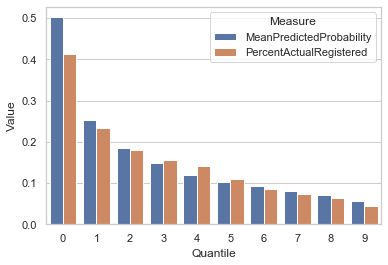

In [20]:
sb.set(style='whitegrid')
ax = sb.barplot(x='Quantile', y='Value', hue='Measure', data=melted_quantile_stats)
plt.savefig('../reports/figures/quantile_plot.png')

In [21]:
y_pred = clf_logreg.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
(tn, fp, fn, tp)

(111985, 841, 16292, 1502)

In [22]:
print(classification_report(y_test, y_pred))

precision    recall  f1-score   support

           0       0.87      0.99      0.93    112826
           1       0.64      0.08      0.15     17794

    accuracy                           0.87    130620
   macro avg       0.76      0.54      0.54    130620
weighted avg       0.84      0.87      0.82    130620



# Undersample negative target for balanced classes

In [23]:
data[target_name].value_counts()

0    783310
1    127518
Name: RegisteredInTargetPeriod, dtype: int64

In [24]:
from sklearn.utils import resample

# Separate majority (negative) and minority (positive) targets
data_majority = data[data[target_name] == 0]
data_minority = data[data[target_name] == 1]

# Downsample the majority
data_majority_downsampled = resample(data_majority, replace=False, n_samples=data[target_name].value_counts()[1], random_state=503)

# Combine into a new dataset
data_downsampled = pd.concat([data_majority_downsampled, data_minority])

data_downsampled[target_name].value_counts()

1    127518
0    127518
Name: RegisteredInTargetPeriod, dtype: int64

In [25]:
# Construct feature set (remove date/time columns)
# feature_names =list(data.columns).remove(['Random_ID', 'CutoffDate', 'TargetPeriodEndDate'])
feature_names = ['DaysSinceLastRegistration', 'PastRegistrations', 'DaysSinceFirstRegistration', 'ModalDonationLocation_Center', 'PercentOfTargetPeriodEligible']

X = data_downsampled.loc[:, feature_names]
y = data_downsampled.loc[:, target_name]

# Split data randomly
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=503)
print(f"Training feature set size: {X_train.shape}")
print(f"Training response set size: {y_train.shape}")
print(f"Test feature set size: {X_test.shape}")
print(f"Test response set size: {y_test.shape}")

Training feature set size: (204028, 5)
Training response set size: (204028,)
Test feature set size: (51008, 5)
Test response set size: (51008,)


In [26]:
# Train model on downsampled training data
clf_logreg = LogisticRegression(penalty='none', random_state=503).fit(X_train, y_train)

In [27]:
# Test on test data
y_pred = clf_logreg.predict(X_test)
roc_auc_score(y_test, y_pred)

0.6635741903600667

In [28]:
# See breakdown of predicted classes
pd.DataFrame(y_pred)[0].value_counts()

0    30380
1    20628
Name: 0, dtype: int64

In [29]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
(tn, fp, fn, tp)

(19249, 6066, 11131, 14562)

In [30]:
print(classification_report(y_test, y_pred))

precision    recall  f1-score   support

           0       0.63      0.76      0.69     25315
           1       0.71      0.57      0.63     25693

    accuracy                           0.66     51008
   macro avg       0.67      0.66      0.66     51008
weighted avg       0.67      0.66      0.66     51008



In [31]:
# Test on holdout cutoff date set
clf_logreg.predict(X_val).sum()  # Predicted positives

90747

In [32]:
y_val.sum()  # Actual positives

38726

In [33]:
roc_auc_score(y_val.to_numpy(), clf_logreg.predict(X_val))

0.6552315617727212

In [34]:
tn, fp, fn, tp = confusion_matrix(y_val.to_numpy(), clf_logreg.predict(X_val)).ravel()
(tn, fp, fn, tp)

(152107, 66895, 14874, 23852)